In [181]:
PROJECT_PATH = '/content/drive/MyDrive/Colab Notebooks/BacalavrThesis/'

import sys
sys.path.insert(1, PROJECT_PATH + "library")

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/BacalavrThesis/library')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from os import walk
from scipy.interpolate import interp1d
from sklearn.decomposition import PCA
import itertools
import lam.ssa as ssa


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from lam.utils import *
from metrics import *
import math
from numpy import linalg as LA

plt.rcParams["figure.figsize"] = (16,8)

Генерация


In [275]:
m = 20
N = 200
t = 6*np.pi
T = 2*np.pi/t * N

X1 = np.zeros([m, N])


for i in range(m):
  a_i = (i)/(1.5*m)
  k1 = np.random.normal(0, 1/5, 1)[0]
  k2 = np.random.normal(0, 1/10, N)
  X1[i, :] = np.sin(np.linspace(0, t, N))  + a_i*np.sin(np.linspace(0, 2*t, N)) + k1*np.sin(np.linspace(0, 4*t, N)) + k2 # +k1*np.sin(np.linspace(0, 4*t, N))



Предсказание

In [276]:
l = 1
n_comp = 4
list_sing_values = []

for i, x in enumerate(X1):
  model = ssa.SSA(d = n_comp, l = int(N/1.2))
  pred, sing_value = model.fit_row(x)
  list_sing_values.append(sing_value)



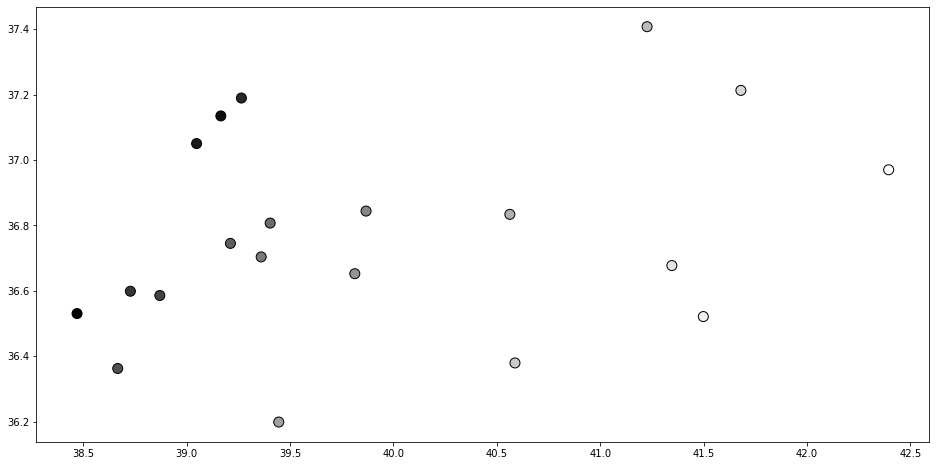

In [277]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data...
xx = [sing_value[0] for sing_value in list_sing_values]
y = [sing_value[1] for sing_value in list_sing_values]
c = list(range(len(list_sing_values)))
# Plot...

plt.scatter(xx, y, c = c, linewidths=1, edgecolors = [(0,0,0)]*len(x), s=100)
plt.gray()
plt.show()

In [280]:
stab_errors = []
pred_errors = []
for i, x in enumerate(X1):
  if i == 0:
    x_prev = x
    model = ssa.SSA(d = n_comp, l = int(N/1.2))
    pred_prev, sing_prev = model.fit_row(x)
    continue
  model = ssa.SSA(d = n_comp, l = int(N/1.2))
  pred, sing = model.fit_row(x) 

  stab_error = LA.norm(sing-sing_prev)/LA.norm(x-x_prev)
  stab_errors.append(stab_error)

  pred_errors.append(LA.norm(pred-x))



MinStabError = min(stab_errors)
MaxStabError = max(stab_errors)
MeanStabError = np.mean(np.array(stab_errors))
mean_error = np.mean(np.array(pred_errors))
MinStabError, MeanStabError, MaxStabError, mean_error

(0.3981215458761175, 2.1226700886895644, 3.67020025489821, 1.7739930974680673)

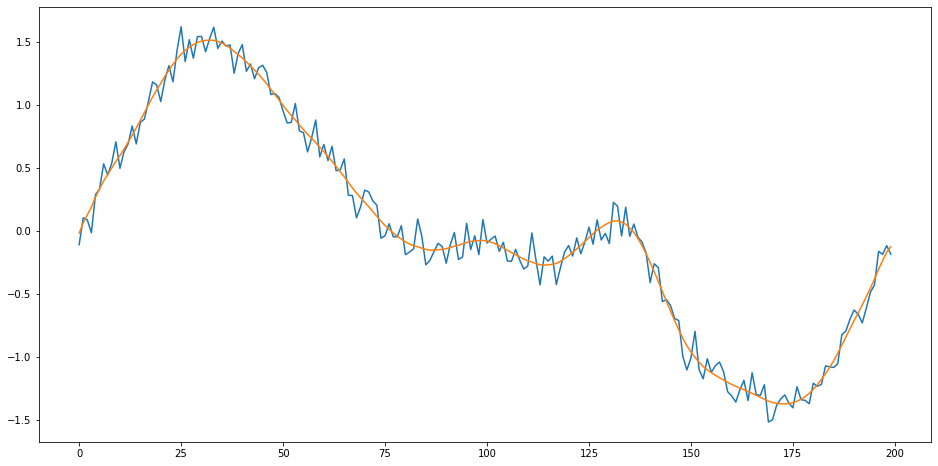

In [273]:
import matplotlib.pyplot as plt
plt.plot(x)
seq0 = model.fit_row(x)
plt.plot(pred)
plt.show()